In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math as ma

In [2]:
# import the data
training_data = pd.read_csv("Dataset/trainingData.csv")
testing_data = pd.read_csv("Dataset/validationData.csv")
# drop columns that won't be in use
training_data = training_data.drop(columns=['SPACEID', 'RELATIVEPOSITION', 'USERID', 'PHONEID', 'TIMESTAMP'])
testing_data = testing_data.drop(columns=['SPACEID', 'RELATIVEPOSITION', 'USERID', 'PHONEID', 'TIMESTAMP'])
# join the training and testing data
data = pd.concat([testing_data, training_data], ignore_index=True)
# create a copy for visualisations
data_explore = data.copy()

# split the rssi_levels (features) from the rest (labels) for further exploration
rssi_levels = data_explore.iloc[:, 0:520]
longitude = data_explore.iloc[:, 520]
latitude = data_explore.iloc[:, 521]
floor = data_explore.iloc[:, 522]
building = data_explore.iloc[:, 523]

data_explore

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP515,WAP516,WAP517,WAP518,WAP519,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID
0,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,-7515.916799,4.864890e+06,1,1
1,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,-7383.867221,4.864840e+06,4,2
2,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,-7374.302080,4.864847e+06,4,2
3,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,-7365.824883,4.864843e+06,4,2
4,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,-7641.499303,4.864922e+06,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21043,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,-7485.468600,4.864875e+06,3,1
21044,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,-7390.620600,4.864836e+06,1,2
21045,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,-7516.841500,4.864889e+06,3,1
21046,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,-7537.321900,4.864896e+06,3,1


In [3]:
testing_data

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP515,WAP516,WAP517,WAP518,WAP519,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID
0,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,-7515.916799,4.864890e+06,1,1
1,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,-7383.867221,4.864840e+06,4,2
2,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,-7374.302080,4.864847e+06,4,2
3,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,-7365.824883,4.864843e+06,4,2
4,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,-7641.499303,4.864922e+06,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1106,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,-7317.344231,4.864796e+06,3,2
1107,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,-7313.731120,4.864792e+06,3,2
1108,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,-7637.535798,4.864903e+06,0,0
1109,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,-7636.654005,4.864905e+06,0,0


In [4]:
# empty lists for storage
list_of_rssi_levels = []
list_of_num_of_waps = []
# loop through each row of the rssi values
for row in rssi_levels.values:
    # start of each row
    # number of valid WAPs per row
    num_of_waps = 0
    for value in row:
        # each value
        # check if the current value was recorded
        if value <= 0: 
            num_of_waps += 1
            list_of_rssi_levels.append(value)
    # end of each row
    list_of_num_of_waps.append(num_of_waps)

##### Histograms <a class='anchor' id='histograms'></a>

In the 'Distribution of WAPs detected per reading' it shows that the majority of the time there are between 10 & 20 WAPs detected at each reading. Given that there are 520 unique WAPs in the dataset, this is not very good as on average the algorithms will only be training off of between 10 & 20 features. Because if the RSS value is not recorded it has been placed in the dataset with the artifical value of +100, thus wasting extra time training the model with more features than are not needed.

Then looking over at the 'Distribution of RSS values' the most common reading recorded is between the range of -80 & -90dbm, this proves to be another issue related to the recorded features. As a perfect signal is represented by 0dBm and a very weak signal is around the -100dBm region. 

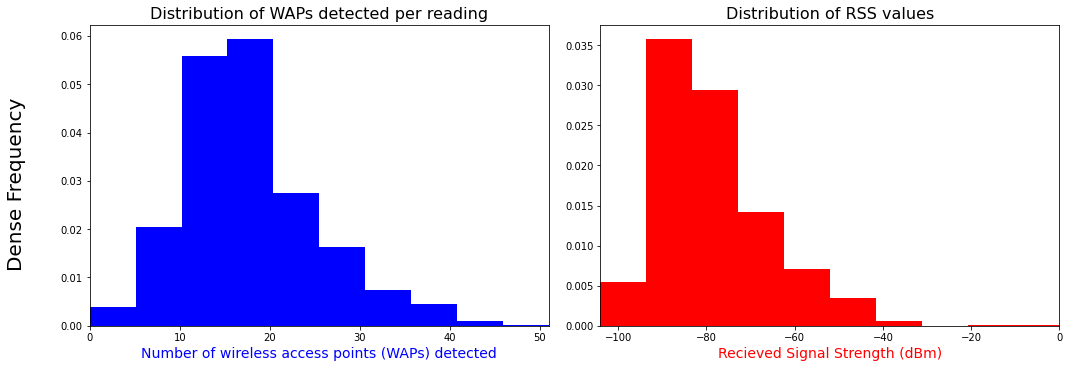

In [5]:
histograms = [list_of_num_of_waps, list_of_rssi_levels]
colours = ['blue', 'red']
titles = ['Distribution of WAPs detected per reading', 'Distribution of RSS values']
x_labels = ['Number of wireless access points (WAPs) detected', 'Recieved Signal Strength (dBm)']

fig, axs = plt.subplots(1, 2, constrained_layout=True, figsize=(14, 5))
fig.text(-0.05, 0.5, 'Dense Frequency', va='center', rotation='vertical', fontsize=20)

for n in range(len(axs)):
    axs[n].hist(histograms[n], density=True, color=colours[n])
    axs[n].set_title(titles[n], fontsize=16)
    axs[n].set_xlabel(x_labels[n], fontsize=14, color=colours[n])
    axs[n].set_xlim(np.min(histograms[n]), np.max(histograms[n]))
    

plt.show()

In [6]:
# empty lists for storage
b1 = []
b2 = []
b3 = []

# loop as many times as there are rows in the dataset
for i in range(len(data_explore)):
    # get the buildingid and floorid of that row
    buildingid = data_explore['BUILDINGID'][i]
    floorid = data_explore['FLOOR'][i]
    
    # check what building the value was recorded in and add the respective floorid
    if buildingid == 0:
        b1.append(floorid)
    elif buildingid == 1:
        b2.append(floorid)
    else:
        b3.append(floorid)

##### Bar Charts

The three bar charts below represent the amount of times each floor occured in each building. With the majority of the dataset readings being recorded in the third building on floor three, and the least amount of readings were recorded in the second building on floor three. In the first building there were 5785, in the second building there were 5503 and in the third building there were 9760 readings recorded.

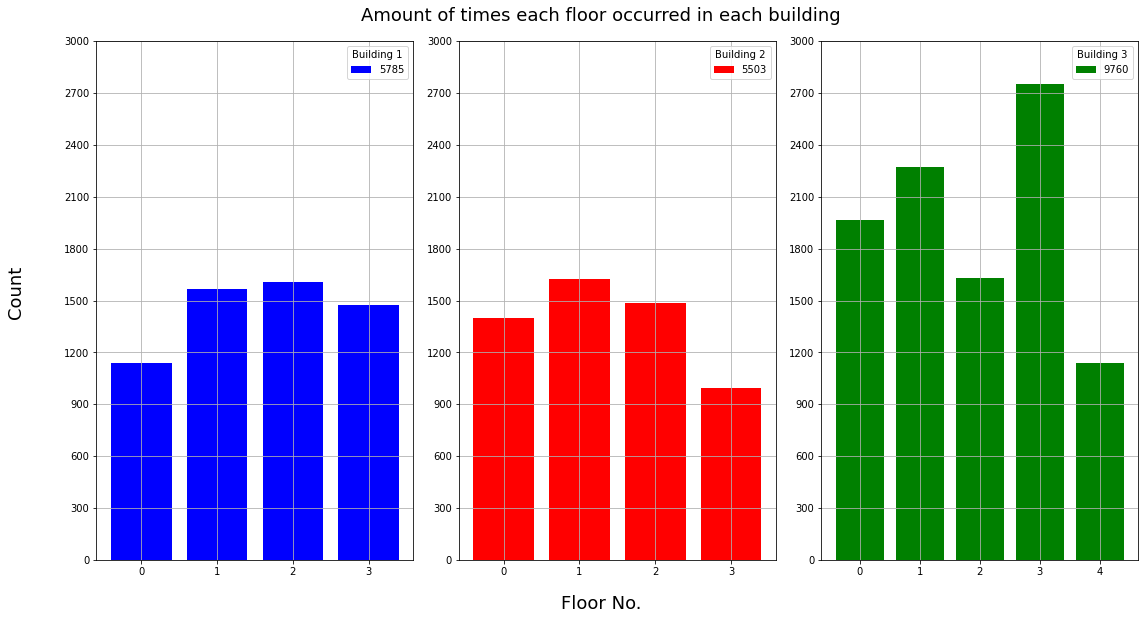

In [7]:
bar_charts = [b1, b2, b3]
colours = ['blue', 'red', 'green']
names = ['Building 1', 'Building 2', 'Building 3']

fig, axs = plt.subplots(1, 3, constrained_layout=True, figsize=(15, 8))
fig.suptitle('Amount of times each floor occurred in each building', fontsize=18)
fig.text(0.5, -0.05, 'Floor No.', ha='center', fontsize=18)
fig.text(-0.05, 0.5, 'Count', va='center', rotation='vertical', fontsize=18)


# loop in a range of 3
for n in range(len(axs)):
    # count the total number of floors per building
    x = [x for x in set(bar_charts[n])]
    # count the total amount of times a floor occured in each building
    count = [bar_charts[n].count(i) for i in range(len(x))]
    
    # create the bar graphs with the values generated above
    axs[n].bar(x, count, color=colours[n])
    axs[n].set_xticks(x)
    axs[n].set_yticks([x for x in range(0, 3100, 300)])
    axs[n].legend([len(bar_charts[n])], loc='best', title=f'{names[n]}')
    axs[n].grid()

plt.show()

##### Scatter

Below gives a visualisation of the space where the readings where taken from. Demonstrating that the middle building had the most of amount occurances where there were no WAPs detected but also where the highest amount of WAPs were detected. From the building on the right you can see that on the majority of the floors there are around 20 WAPs detected at each position, thus giving the impression it is the WAPs coverage is best in this building. And even though the middle building has the highest occurance rate of there being more than 40 WAPs detected in the position, there are not enough of these and a higher proportion of the least amount of WAPs being detected, furthermore, implying the worst WAP coverage is in this building.

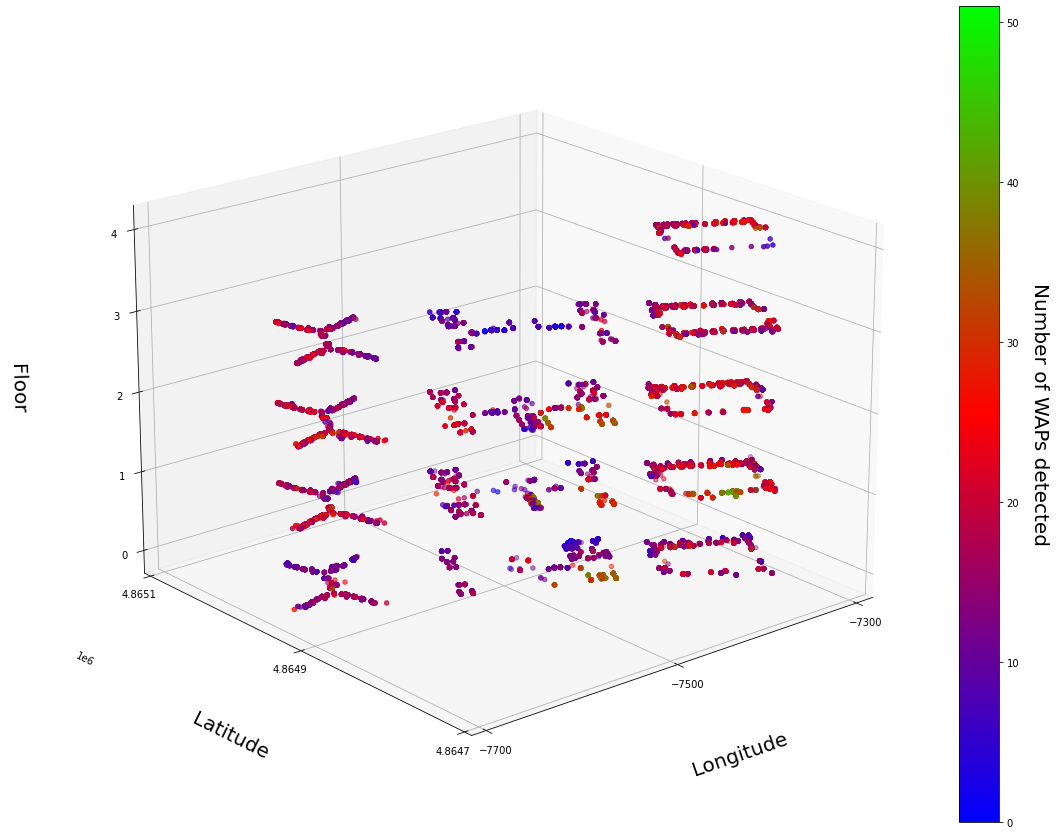

In [8]:
# 10 to the power 6
POW6 = ma.pow(10, 6)
# difference between the lowest and highest values of the x and y axis and the edge of the graph
DELTA = 10
# figure
fig = plt.figure(figsize=(20, 15))
ax = fig.add_subplot(projection='3d')

# axis values
x = longitude
y = latitude
z = floor
c = list_of_num_of_waps

# scatter plot
img = ax.scatter(x, y, z, c=c, cmap='brg')

# axis labels
ax.set_xlabel("Longitude", labelpad=50, fontsize=20)
ax.set_ylabel("Latitude", labelpad=50, fontsize=20)
ax.set_zlabel("Floor", labelpad=50, fontsize=20)
# axis limits
ax.set_xlim(np.min(x)-DELTA, np.max(x)+DELTA)
ax.set_ylim(np.min(y)-DELTA, np.max(y)+DELTA)
# axis ticks
ax.set_xticks([-7700, -7500, -7300])
ax.set_yticks([4.86470*POW6, 4.86490*POW6, 4.86510*POW6])
ax.set_zticks([0, 1, 2, 3, 4])
# viewing angle
ax.view_init(azim=-130, elev=20)

# colour bar
cbar = fig.colorbar(img)
cbar.ax.set_ylabel('Number of WAPs detected', rotation=270, labelpad=30, fontsize=20)


plt.show()

In [9]:
from sklearn.decomposition import PCA

In [10]:
x_train = training_data.iloc[:, 0:520]
x_test = testing_data.iloc[:, 0:520]

In [11]:
# get visual of pca
pca = PCA(520)
x_train_visual = pca.fit_transform(x_train)
x_test_visual = pca.transform(x_test)

variance = pca.explained_variance_ratio_
sum(variance)

1.0

In [12]:
# empty variables for storage
total = 0
freq_sum = []
for i in variance:
    # calculating the total variance after each component
    total += i
    freq_sum.append(total)

# change values to percentages
variance = variance * 100
freq_sum = [x * 100 for x in freq_sum]
df = pd.DataFrame(data={'Variance (%)': variance, 'Explained Variance (%)': freq_sum})
df.index.rename('Component', inplace=True)
df.round(2)
df.head()

,Variance (%),Explained Variance (%)
Component,,
0,14.657091,14.657091
1,5.479158,20.136249
2,4.952448,25.088697
3,4.793480,29.882177
4,3.916326,33.798503


##### PCA Scatter

Below with only 1 component you are given a nearly 15% explained variance, however this starts to rapidly drop off with the combined explained variance of the first 5 components being only 34%. This is not surprising though, because there are a total of 520 principal components. 

When it comes to selected the number of components, you want to pick an amount where the total explained variance is as close to 100% but keeping in mind the purpose of PCA, which is to decrease the time it takes to train and test an algorithm whilst keeping the integrity of the data.

With the below graph you will be able to pick a suitable number of components.

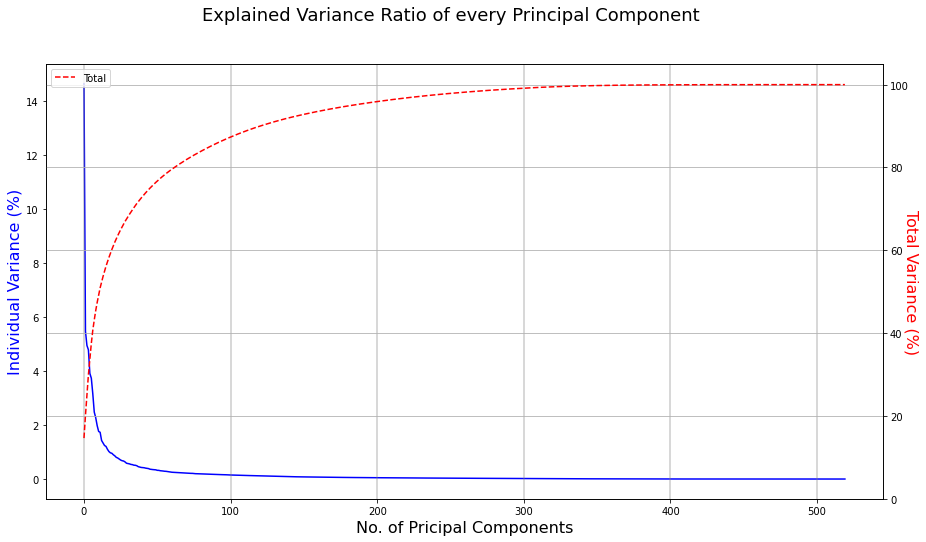

In [13]:
fig, ax0 = plt.subplots(figsize=(15, 8))
fig.suptitle('Explained Variance Ratio of every Principal Component', fontsize=18)

ax0_colour = 'blue'
ax0.plot(variance, color=ax0_colour, label='Individual')
ax0.set_xlabel('No. of Pricipal Components', fontsize=16)
ax0.set_ylabel('Individual Variance (%)', color=ax0_colour, fontsize=16)

# both plots share the same x axis
ax1 = ax0.twinx()
ax1_colour = 'red'
ax1.plot(freq_sum, color=ax1_colour, label='Total', linestyle='dashed')
ax1.set_ylabel('Total Variance (%)', color=ax1_colour, fontsize=16, rotation=270, labelpad=10)
ax1.set_ylim([0, 105])
ax1.set_yticks([x for x in range(0, 110, 20)])

# vertical lines
for i in range(0, 6):
    x = i * 100
    ax0.axvline(x, alpha=0.4, c='gray')
    
    
plt.legend(loc='best')
# horizontal lines
plt.grid()
plt.show()

##### Processing the data

In [14]:
x_train = training_data.iloc[:, 0:520]
y_train_reg = training_data.iloc[:, 520:522]
y_train_class = training_data.iloc[:, 522:524]
y_train = pd.concat([y_train_reg, y_train_class], axis=1)

x_test = testing_data.iloc[:, 0:520]
y_test_reg = testing_data.iloc[:, 520:522]
y_test_class = testing_data.iloc[:, 522:524]
y_test = pd.concat([y_test_reg, y_test_class], axis=1)


x_train.replace(100, -150, inplace=True)
x_test.replace(100, -150, inplace=True)

##### Applying PCA


In [15]:
pca = PCA(300)
pca.fit(x_train)
x_train_pca = pca.transform(x_train)
x_test_pca = pca.transform(x_test)

In [16]:
x_train.shape

(19937, 520)

In [17]:
x_train_pca.shape

(19937, 300)

In [18]:
x_test.shape

(1111, 520)

In [19]:
x_test_pca.shape

(1111, 300)

In [50]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.svm import SVC, SVR
from sklearn.multioutput import MultiOutputClassifier, MultiOutputRegressor
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import classification_report, r2_score, mean_absolute_error, mean_squared_error

In [21]:
# K-Nearest Neighbour
knnc = KNeighborsClassifier()
knnr = KNeighborsRegressor()

# Support Vector Machine
svc = SVC(max_iter=1000)
msvc = MultiOutputClassifier(svc)
svr = SVR(max_iter=1000)
msvr = MultiOutputRegressor(svr)

# Decision Tree
dtc = DecisionTreeClassifier()
dtr = DecisionTreeRegressor()

# Multi-layer perceptron
mlpc = MLPClassifier()
mmlpc = MultiOutputClassifier(mlpc)
mlpr = MLPRegressor()
mmlpr = MultiOutputRegressor(mlpr)

In [22]:
def training_models(model, clf_reg):
    if clf_reg == 0 :
        # classification
        model.fit(x_train_pca, y_train_class)
        predict = model.predict(x_test_pca)
    else:
        # regression
        model.fit(x_train_pca, y_train_reg)
        predict = model.predict(x_test_pca)
    return predict

In [23]:
def create_prediction_frame(clf, reg):
    dataframe_classification = pd.DataFrame(clf, columns=['FLOOR', 'BUILDINGID'])
    dataframe_regression = pd.DataFrame(reg, columns=['LONGITUDE', 'LATITUDE'])
    dataframe_predictions = pd.concat([dataframe_classification, dataframe_regression], axis=1)
    return dataframe_predictions

In [24]:
def model_predictions(knnc, knnr, msvc, msvr, dtc, dtr, mmlpc, mmlpr):
    # Train & predict for each model
    knnc_predict = training_models(knnc, 0)
    knnr_predict = training_models(knnr, 1)
    knn_predictions = create_prediction_frame(knnc_predict, knnr_predict)

    svc_predict = training_models(msvc, 0)
    svr_predict = training_models(msvr, 1)
    svm_predictions = create_prediction_frame(svc_predict, svr_predict)

    dtc_predict = training_models(dtc, 0)
    dtr_predict = training_models(dtr, 1)
    dt_predictions = create_prediction_frame(dtc_predict, dtr_predict)

    mlpc_predict = training_models(mmlpc, 0)
    mlpr_predict = training_models(mmlpr, 1)
    mlp_predictions = create_prediction_frame(mlpc_predict, mlpr_predict)
    
    predictions = (knn_predictions, svm_predictions, dt_predictions, mlp_predictions)
    
    return predictions

In [25]:
def distance_error(true, predict, opt):
    mode = (('LONGITUDE', 'LATITUDE') if opt == 'reg' else ('BUILDINGID', 'FLOOR'))
    x = predict[mode[0]].values
    y = predict[mode[1]].values
    x0 = true[mode[0]].values
    y0 = true[mode[1]].values
    error = np.sqrt(np.square(x-x0) + np.square(y-y0))
    return error 

In [26]:
def missclassed(true, predict, opt):
    error = np.sum(predict[opt].values != true[opt].values)
    return error

In [27]:
def clf_distance_error(true, predict, opt):
    error = (50 if opt == 'BUILDINGID' else 4)
    data = []
    for n in range(len(predict)):
        values = (predict[opt][n], true[opt][n])
        diff = abs(values[0] - values[1])
        error = error * diff
        data.append(error)
    return data

In [28]:
def compute_all_errors(true, predict, wrong_build=50, wrong_floor=4):
    bld_missclassed = missclassed(true, predict, 'BUILDINGID')
    flr_missclassed = missclassed(true, predict, 'FLOOR')
    regression_error = distance_error(true, predict, 'reg')
    classification_error = distance_error(true, predict, 'clf')
    building_error = clf_distance_error(true, predict, 'BUILDINGID')
    floor_error = clf_distance_error(true, predict, 'FLOOR')
    building_floor_error = [a + b for a, b in zip(building_error, floor_error)]
    
    data = {
        'Buildings miss': bld_missclassed,
        'Floors miss': flr_missclassed,
        'Regression error': regression_error,
        'Classification error': classification_error,
        'building': building_error,
        'floor': floor_error,
        'Total class error': building_floor_error
    }
    frame = pd.DataFrame(data)
    return frame

In [29]:
def cdf_plot(errors, mode):
    colours = ['blue', 'red', 'green', 'purple']
    fig, axs = plt.subplots(2, 2, constrained_layout=True, figsize=(13, 7))
    fig.suptitle(f'{mode} CDF Plot', fontsize=20)
    fig.text(0.5, -0.05, 'Distance Error (m)', ha='center', fontsize=18)
    fig.text(-0.05, 0.5, 'Probability (%)', va='center', rotation='vertical', fontsize=18)
    
    for graph in range(2):
        for n in range(2):
            if graph == 0:
                c = n
            else:
                c = n + 2
            count, bins_count = np.histogram(errors[c][0][mode], bins=100)
            pdf = count / sum(count)
            cdf = np.cumsum(pdf)
            axs[graph][n].plot(bins_count[1:], cdf, color=colours[c], label=errors[c][1])
            axs[graph][n].grid()
            axs[graph][n].legend()

In [30]:
def missclassed_classification(errors):
    fig, axs = plt.subplots(1, 2, constrained_layout=True, figsize=(13, 5))
    # data
    titles = ['Number of Buildings missclassified', 'Number of Floors missclassified']
    x = [_ for _ in range(len(errors))]
    b_heights = [errors[_][0]['Buildings miss'][0] for _ in range(len(errors))]
    f_heights = [errors[_][0]['Floors miss'][0] for _ in range(len(errors))]
    labels = [errors[_][1] for _ in range(len(errors))]
    colours = ['blue', 'red', 'green', 'purple']
    width = 0.5
    
    # graphs
    for n in range(2):
        if n == 0:
            heights = b_heights
        else:
            heights = f_heights
        for _ in range(len(errors)):
            axs[n].bar(x[_], heights[_], width=width, label=labels[_], color=colours[_])
        axs[n].set_xticks(x)
        axs[n].set_xticklabels(labels)
        axs[n].set_title(titles[n], fontsize=14)
        axs[n].legend()
        axs[n].grid()


In [31]:
def model_errors(knn, svm, dt, mlp):
    knn_errors = compute_all_errors(y_test, knn)
    svm_errors = compute_all_errors(y_test, svm)
    dt_errors = compute_all_errors(y_test, dt)
    mlp_errors = compute_all_errors(y_test, mlp)
    errors = ((knn_errors, 'knn'), (svm_errors, 'svm'), (dt_errors, 'dt'), (mlp_errors, 'mlp'))
    return errors

In [32]:
knn_predictions, svm_predictions, dt_predictions, mlp_predictions = model_predictions(knnc, knnr, msvc, msvr, dtc, dtr, mmlpc, mmlpr)
paramless_models = model_errors(knn_predictions, svm_predictions, dt_predictions, mlp_predictions)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimiza

In [33]:
paramless_models

((      Buildings miss  Floors miss  Regression error  Classification error  \
  0                  6          189         44.361733                   2.0   
  1                  6          189          1.991149                   0.0   
  2                  6          189          4.461367                   0.0   
  3                  6          189          3.995626                   0.0   
  4                  6          189          3.258913                   0.0   
  ...              ...          ...               ...                   ...   
  1106               6          189          5.089645                   0.0   
  1107               6          189         53.392661                   0.0   
  1108               6          189          6.203069                   0.0   
  1109               6          189         15.199455                   0.0   
  1110               6          189         11.002091                   0.0   
  
        building  floor  Total class error  
  0 

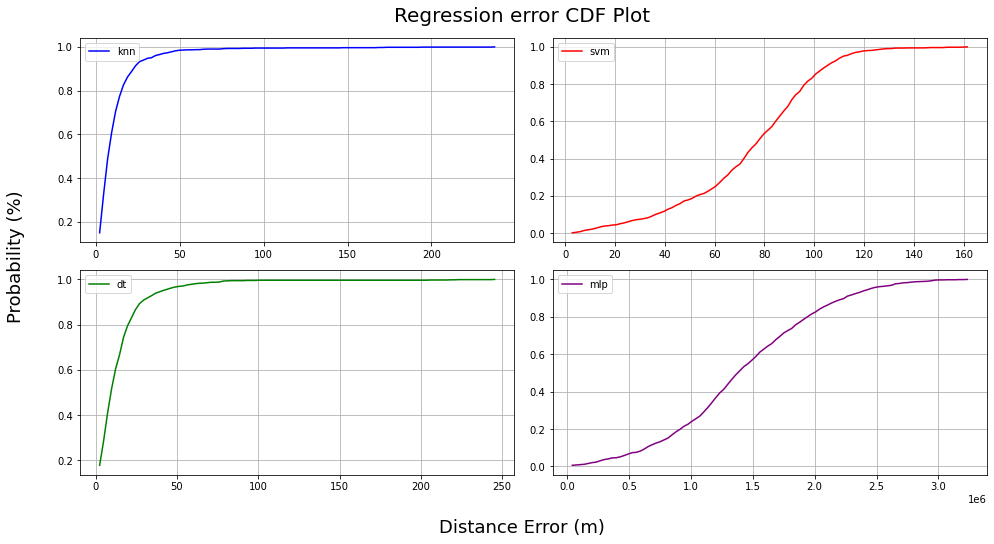

In [34]:
cdf_plot(paramless_models, 'Regression error')

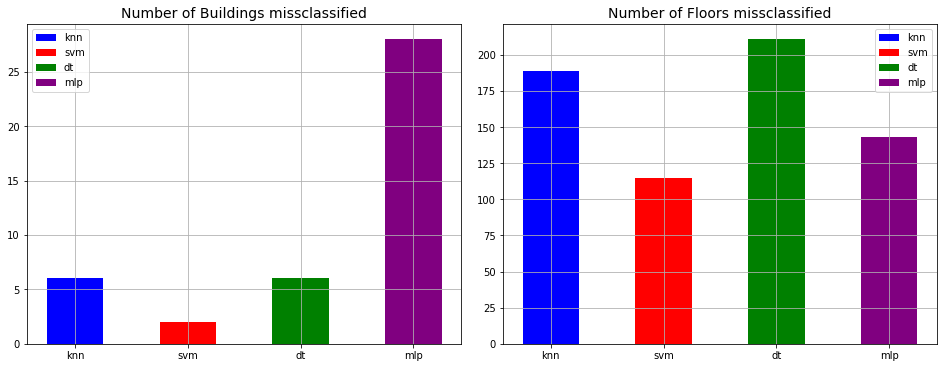

In [37]:
missclassed_classification(paramless_models)

In [38]:
def reg_results(true, predictions, name):
    predict = (predictions['LONGITUDE'], predictions['LATITUDE'])
    truth = (true['LONGITUDE'], true['LATITUDE'])
    
    r2 = r2_score(truth, predict)
    mae = mean_absolute_error(truth, predict)
    mse = mean_squared_error(truth, predict)
    
    data = {
        'R2 score': r2,
        'Mean Absolute Error': mae,
        'Mean Sqaured Error': mse
    }
    
    results = pd.DataFrame(data, index=[name])
    
    return results

In [39]:
def clf_results(true, predictions, name):
    predict = (predictions['BUILDINGID'], predictions['FLOOR'])
    truth = (true['BUILDINGID'], true['FLOOR'])
    
    bld_cr = classification_report(truth[0], predict[0])
    flr_cr = classification_report(truth[1], predict[1])
    
    return bld_cr, flr_cr

In [51]:
reg_results(y_test, knn_predictions, 'knn')

,R2 score,Mean Absolute Error,Mean Sqaured Error
knn,1.0,7.192582,192.297549


In [52]:
reg_results(y_test, svm_predictions, 'svm')

,R2 score,Mean Absolute Error,Mean Sqaured Error
svm,1.0,46.069279,3146.10827


In [53]:
reg_results(y_test, dt_predictions, 'dt')

,R2 score,Mean Absolute Error,Mean Sqaured Error
dt,1.0,8.904061,266.807949


In [54]:
reg_results(y_test, mlp_predictions, 'mlp')

,R2 score,Mean Absolute Error,Mean Sqaured Error
mlp,0.799102,710352.967591,1.192347e+12


In [55]:
k = clf_results(y_test, knn_predictions, 'knn')
print(k[0]) # Building

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       536
           1       0.99      0.99      0.99       307
           2       0.99      0.99      0.99       268

    accuracy                           0.99      1111
   macro avg       0.99      0.99      0.99      1111
weighted avg       0.99      0.99      0.99      1111



In [56]:
print(k[1]) # Floor

              precision    recall  f1-score   support

           0       0.76      0.91      0.83       132
           1       0.96      0.81      0.88       462
           2       0.78      0.77      0.77       306
           3       0.71      0.96      0.82       172
           4       0.96      0.69      0.81        39

    accuracy                           0.83      1111
   macro avg       0.83      0.83      0.82      1111
weighted avg       0.85      0.83      0.83      1111



In [57]:
s = clf_results(y_test, svm_predictions, 'svm')
print(s[0]) # Building

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       536
           1       0.99      1.00      1.00       307
           2       1.00      1.00      1.00       268

    accuracy                           1.00      1111
   macro avg       1.00      1.00      1.00      1111
weighted avg       1.00      1.00      1.00      1111



In [58]:
print(s[1]) # Floor

              precision    recall  f1-score   support

           0       0.90      0.89      0.90       132
           1       0.96      0.88      0.92       462
           2       0.84      0.92      0.88       306
           3       0.87      0.94      0.90       172
           4       0.88      0.74      0.81        39

    accuracy                           0.90      1111
   macro avg       0.89      0.88      0.88      1111
weighted avg       0.90      0.90      0.90      1111



In [59]:
d = clf_results(y_test, dt_predictions, 'dt')
print(d[0]) # Building

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       536
           1       0.99      0.99      0.99       307
           2       0.99      1.00      1.00       268

    accuracy                           0.99      1111
   macro avg       0.99      1.00      0.99      1111
weighted avg       0.99      0.99      0.99      1111



In [60]:
print(d[1]) # Floor

              precision    recall  f1-score   support

           0       0.78      0.80      0.79       132
           1       0.91      0.82      0.86       462
           2       0.75      0.82      0.79       306
           3       0.72      0.87      0.78       172
           4       0.89      0.44      0.59        39

    accuracy                           0.81      1111
   macro avg       0.81      0.75      0.76      1111
weighted avg       0.82      0.81      0.81      1111



In [61]:
m = clf_results(y_test, mlp_predictions, 'mlp')
print(m[0]) # Building

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       536
           1       0.99      0.93      0.96       307
           2       0.91      1.00      0.95       268

    accuracy                           0.97      1111
   macro avg       0.97      0.97      0.97      1111
weighted avg       0.98      0.97      0.97      1111



In [62]:
print(m[1]) # Floor

              precision    recall  f1-score   support

           0       0.86      0.82      0.84       132
           1       0.93      0.88      0.90       462
           2       0.82      0.90      0.85       306
           3       0.84      0.90      0.87       172
           4       0.89      0.64      0.75        39

    accuracy                           0.87      1111
   macro avg       0.87      0.83      0.84      1111
weighted avg       0.87      0.87      0.87      1111



### Finding the best hyperparameters

In [63]:
# K-Nearest Neighbour
sknnc = KNeighborsClassifier(n_neighbors=3)
sknnr = KNeighborsRegressor(n_neighbors=3)

# Support Vector Machine
svc = SVC(C=100, max_iter=1000)
smsvc = MultiOutputClassifier(svc)
svr = SVR(C=30, max_iter=1000)
smsvr = MultiOutputRegressor(svr)

# Decision Tree
sdtc = DecisionTreeClassifier(max_depth=15)
sdtr = DecisionTreeRegressor(max_depth=35)

# Multi-layer perceptron
mlpc = MLPClassifier(hidden_layer_sizes=(32, 32, 32, 32, 16))
smmlpc = MultiOutputClassifier(mlpc)
mlpr = MLPRegressor(hidden_layer_sizes=(32, 32, 32, 100))
smmlpr = MultiOutputRegressor(mlpr)

In [64]:
knn_predictions, svm_predictions, dt_predictions, mlp_predictions = model_predictions(sknnc, sknnr, smsvc, smsvr, sdtc, sdtr, smmlpc, smmlpr)
parameter_models = model_errors(knn_predictions, svm_predictions, dt_predictions, mlp_predictions)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimiza

In [65]:
parameter_models

((      Buildings miss  Floors miss  Regression error  Classification error  \
  0                  7          189      6.093610e+01              1.414214   
  1                  7          189      1.833935e+00              0.000000   
  2                  7          189      4.461367e+00              0.000000   
  3                  7          189      2.306398e+00              0.000000   
  4                  7          189      4.616851e+00              0.000000   
  ...              ...          ...               ...                   ...   
  1106               7          189      5.007216e+00              0.000000   
  1107               7          189      5.587935e-09              0.000000   
  1108               7          189      5.566695e+00              0.000000   
  1109               7          189      1.017847e+01              0.000000   
  1110               7          189      1.101603e+01              0.000000   
  
        building  floor  Total class error  
  0 

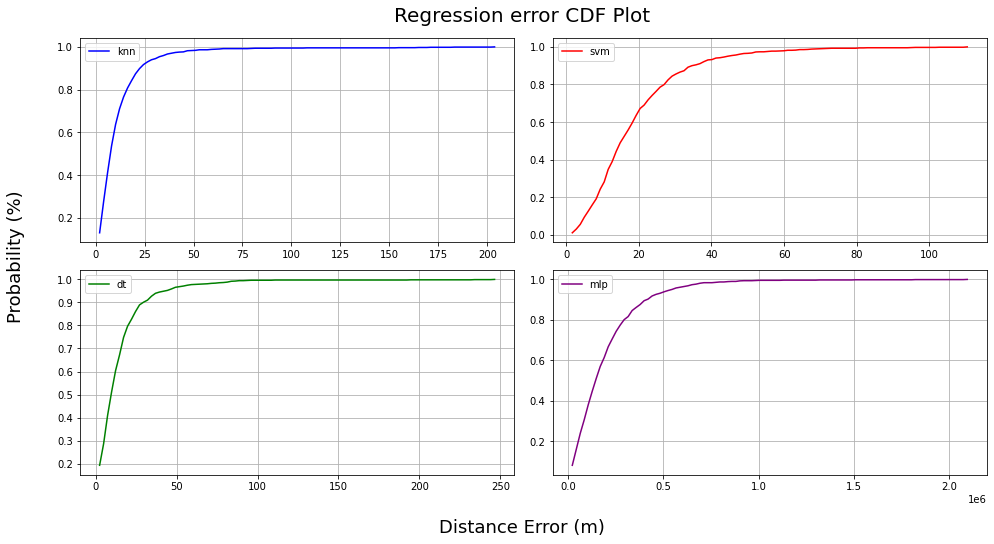

In [66]:
cdf_plot(parameter_models, 'Regression error')

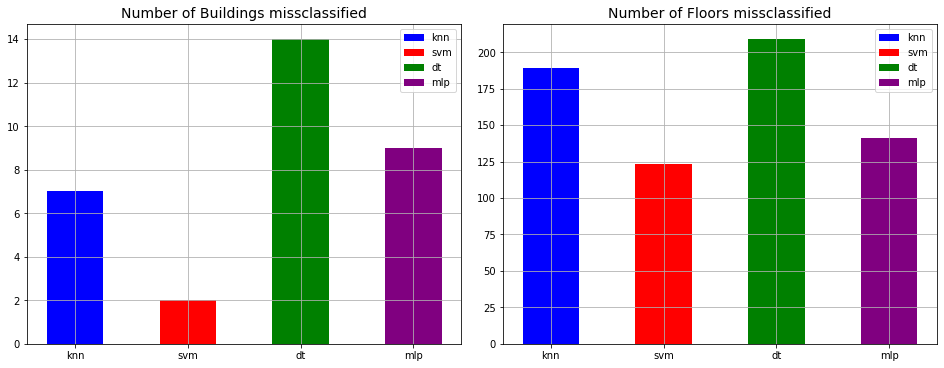

In [67]:
missclassed_classification(parameter_models)

In [68]:
reg_results(y_test, knn_predictions, 'knn')

,R2 score,Mean Absolute Error,Mean Sqaured Error
knn,1.0,7.205465,182.560593


In [69]:
reg_results(y_test, svm_predictions, 'svm')

,R2 score,Mean Absolute Error,Mean Sqaured Error
svm,1.0,11.891955,269.680305


In [70]:
reg_results(y_test, dt_predictions, 'dt')

,R2 score,Mean Absolute Error,Mean Sqaured Error
dt,1.0,8.963098,263.300227


In [71]:
reg_results(y_test, mlp_predictions, 'mlp')

,R2 score,Mean Absolute Error,Mean Sqaured Error
mlp,0.993835,96498.919182,3.659241e+10


In [72]:
k = clf_results(y_test, knn_predictions, 'knn')
print(k[0]) # Building

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       536
           1       1.00      0.99      0.99       307
           2       0.98      1.00      0.99       268

    accuracy                           0.99      1111
   macro avg       0.99      0.99      0.99      1111
weighted avg       0.99      0.99      0.99      1111



In [73]:
print(k[1]) # Floor

              precision    recall  f1-score   support

           0       0.72      0.89      0.79       132
           1       0.96      0.81      0.88       462
           2       0.79      0.78      0.79       306
           3       0.73      0.95      0.82       172
           4       0.96      0.69      0.81        39

    accuracy                           0.83      1111
   macro avg       0.83      0.83      0.82      1111
weighted avg       0.85      0.83      0.83      1111



In [74]:
s = clf_results(y_test, svm_predictions, 'svm')
print(s[0]) # Building

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       536
           1       1.00      1.00      1.00       307
           2       0.99      1.00      1.00       268

    accuracy                           1.00      1111
   macro avg       1.00      1.00      1.00      1111
weighted avg       1.00      1.00      1.00      1111



In [75]:
print(s[1]) # Floor

              precision    recall  f1-score   support

           0       0.83      0.90      0.87       132
           1       0.96      0.85      0.90       462
           2       0.84      0.92      0.88       306
           3       0.88      0.94      0.90       172
           4       0.89      0.79      0.84        39

    accuracy                           0.89      1111
   macro avg       0.88      0.88      0.88      1111
weighted avg       0.89      0.89      0.89      1111



In [76]:
d = clf_results(y_test, dt_predictions, 'dt')
print(d[0]) # Building

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       536
           1       0.99      0.98      0.98       307
           2       0.96      1.00      0.98       268

    accuracy                           0.99      1111
   macro avg       0.98      0.99      0.99      1111
weighted avg       0.99      0.99      0.99      1111



In [77]:
print(d[1]) # Floor

              precision    recall  f1-score   support

           0       0.77      0.80      0.78       132
           1       0.91      0.81      0.86       462
           2       0.77      0.82      0.79       306
           3       0.72      0.90      0.80       172
           4       0.82      0.46      0.59        39

    accuracy                           0.81      1111
   macro avg       0.80      0.76      0.76      1111
weighted avg       0.82      0.81      0.81      1111



In [78]:
m = clf_results(y_test, mlp_predictions, 'mlp')
print(m[0]) # Building

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       536
           1       0.99      0.98      0.99       307
           2       0.98      0.99      0.99       268

    accuracy                           0.99      1111
   macro avg       0.99      0.99      0.99      1111
weighted avg       0.99      0.99      0.99      1111



In [79]:
print(m[1]) # Floor

              precision    recall  f1-score   support

           0       0.80      0.83      0.81       132
           1       0.93      0.85      0.89       462
           2       0.83      0.91      0.87       306
           3       0.86      0.92      0.89       172
           4       0.94      0.77      0.85        39

    accuracy                           0.87      1111
   macro avg       0.87      0.86      0.86      1111
weighted avg       0.88      0.87      0.87      1111

